# PREDIÇÃO SATISFAÇÃO DO CLIENTE - OLIST

## DESCRIÇÃO OLIST - PLATAFORMA DE E-COMMERCE

"Conjunto de dados públicos de comércio eletrônico brasileiro por Olist
O conjunto de dados tem informações de 100 mil pedidos de 2016 a 2018 feitos em vários marketplaces no Brasil.

A Olist conecta pequenas empresas de todo o Brasil a canais sem complicações e com um único contrato. Esses comerciantes podem vender seus produtos através da Olist Store e enviá-los diretamente aos clientes usando os parceiros de logística da Olist.

Depois que um cliente compra o produto da Olist Store, um vendedor é notificado para atender esse pedido. Assim que o cliente recebe o produto, ou vence a data prevista de entrega, o cliente recebe uma pesquisa de satisfação por e-mail onde pode dar uma nota da experiência de compra e anotar alguns comentários."


## Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import os
import re
import seaborn as sns
import glob
%matplotlib inline
import matplotlib.style as style
style.use('ggplot')

Bibliotecas e dependências do Python utilizadas:
* Pandas – Manipulação e análise de dados
* NumPy – Manipulação de dados
* Seaborn - Visualização gráfica
* Matplotlib – Visualização gráfica
* Pycaret - Aprendizado de máquina

# Leitura dos dados

A base de dados pode ser acessada no Kaggle, em https://www.kaggle.com/olistbr/brazilian-ecommerce
A sbase de dados completa conta com mais de 100 mil regitros de pedidos em 8 conjuntos de dados separados, sobre:

Consumidores
Vendedores
Produtos
Pedidos
Categoria de pedidos
Avaliação de pedidos
Pagamentos
Geolocalização
Cada conjunto possui informações exclusivas sobre um assunto em questão, podendo ser cruzados de diversas maneiras a fim de se obter informações sobre o quesito escolhido. No caso deste trabalho, a abordagem será realizada com foco nos Consumidores.

Cada recurso ou colunas de diferentes arquivos csv são descritos abaixo:

* The  `olist_customers_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**customer_id** | Id of the consumer who made the purchase.
**customer_unique_id**    | Unique Id of the consumer.
**customer_zip_code_prefix** | Zip Code of the location of the consumer.
**customer_city** | Name of the City from where order is made.
**customer_state** |  State Code from where order is made(Ex- sao paulo-SP).

* The `olist_sellers_dataset.csv` contains following features:

Feature | Description 
----------|---------------
**seller_id** |   Unique Id of the seller registered in olist.
**seller_zip_code_prefix** | Zip Code of the location of the seller.
**seller_city** | Name of the City of the seller.
**seller_state** | State Code (Ex- sao paulo-SP)


* The `olist_order_items_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**order_item_id** | A Unique id given to each item ordered in the order.
**product_id** |A unique id given to each product available on the site.
**seller_id** | Unique Id of the seller registered in olist.
**shipping_limit_date** | The date before which shipping of the ordered    product must be completed.
**price** | Actual price of the products ordered .
**freight_value** | Price rate at which a product is delivered from one point to another. 

* The `olist_order_payments_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**payment_sequential** | sequences of the payments made in case of EMI.
**payment_type** |  mode of payment used.(Ex-Credit Card)
**payment_installments** | number of installments in case of EMI purchase.
**payment_value** | Total amount paid for the purshase order.



* The `olist_orders_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**customer_id** | Id of the consumer who made the purchase.
**order_status** | status of the order made i.e delivered, shipped etc.
**order_purchase_timestamp** | Timestamp of the purchase.
**order_approved_at** | Timestamp of the order approval.
**order_delivered_carrier_date** | delivery date at which carrier made the delivery.
**order_delivered_customer_date** | date at which customer got the product.
**order_estimated_delivery_date** | estimated delivery date of the products.


* The `olist_order_reviews_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**review_id** |Id of the review given on the product ordered by the order id.
**order_id** |  A unique id of order made by the consumers.
**review_score** | review score given by the customer for each order on the scale of 1–5. 
**review_comment_title** | Title of the review
**review_comment_message** | Review comments posted by the consumer for each order.
**review_creation_date** |Timestamp of the review when it is created.
**review_answer_timestamp** | Timestamp of the review answered.


* The `olist_products_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**product_id** | A unique identifier for the proposed project.
**product_category_name** | Name of the product category
**product_name_lenght** | length of the string which specify the name given to the products ordered.
**product_description_lenght** | length of the description written for each product ordered on the site.
**product_photos_qty** | Number of photos of each product ordered available on the shopping portal.
**product_weight_g** | Weight of the products ordered in grams.
**product_length_cm** | Length of the products ordered in centimeters.
**product_height_cm** | Height of the products ordered in centimeters.
**product_width_cm** | width of the product ordered in centimeters.


# Leitura arquivos

Foi realizada a importação de todos os datasets através do Pandas e posteriormente foram cruzados a fim de formar um único Dataframe com informações de: consumidores, geolocalização, pedidos, categorias, produtos, vendedores e avaliações.

In [2]:
items = pd.read_csv("Data/olist_order_items_dataset.csv")  

In [3]:
order = pd.read_csv("Data/olist_orders_dataset.csv")  

In [4]:
products = pd.read_csv("Data/olist_products_dataset.csv")  

In [5]:
geolocation = pd.read_csv("Data/olist_geolocation_dataset.csv")  

In [6]:
reviews = pd.read_csv("Data/olist_order_reviews_dataset.csv")  

In [7]:
customers = pd.read_csv("Data/olist_customers_dataset.csv") 

In [8]:
payments = pd.read_csv("Data/olist_order_payments_dataset.csv") 

In [9]:
seller = pd.read_csv("Data/olist_sellers_dataset.csv") 

In [10]:
print(items.shape)
items.head(2)

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [11]:
print(order.shape)
order.head(2)

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [12]:
print(products.shape)
products.head(2)

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [13]:
print(geolocation.shape)
geolocation.head(2)

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [14]:
print(reviews.shape)
reviews.head(2)

(99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [15]:
print(customers.shape)
customers.head(2)

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [16]:
print(payments.shape)
payments.head(2)

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [17]:
print(seller.shape)
seller.head(2)

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


# Limpando dados

## Item

Este conjunto de dados contém informações sobre os produtos em cada pedido. Os preços estão reais. O valor do frete é calculado de acordo com as medidas e peso de cada item.

In [18]:
items.shape

(112650, 7)

In [19]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Shipping_limit_date indica a data limite para o vendedor lidar com o pedido para o parceiro logístico. É uma etapa no processo de envio, mas é o tempo de entrega real que afeta a satisfação do cliente, portanto, descartaremos esse atributo.

In [21]:
items.drop('shipping_limit_date', axis=1, inplace=True)

O order_item_id representa a quantidade do item em cada pedido. Devido à falta de conexão entre os conjuntos de dados de produto, pedido e avaliação, não é possível vincular cada produto em um pedido de vários itens à sua própria avaliação. Portanto, manteremos apenas pedidos de um único item.

In [22]:
linhas_mantidas = len(items.loc[items['order_item_id'] == 1,])
print('Número de pedidos de um único item a ser mantido: ', linhas_mantidas)
print('Porcentagem: ', linhas_mantidas/len(items)*100)


Número de pedidos de um único item a ser mantido:  98666
Porcentagem:  87.58632933865957


In [23]:
itens_pedidos_restritos = items.loc[items['order_item_id'] == 1,]
itens_pedidos_restritos.drop('order_item_id', axis=1, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_12392\1839273380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itens_pedidos_restritos.drop('order_item_id', axis=1, inplace=True)


### Envio do arquivo limpo- itens.csv

In [24]:
items.to_csv('Data/itens.csv')

## Clientes - customers

Esse conjunto de dados contém informações sobre o ID do cliente e sua localização no Brasil, que podem ser usadas para rastrear o local de entrega do pedido e principalmente analisar a experiência de compra de cada cliente.

Cada cliente recebe um customer_unique_id, enquanto um novo customer_id é atribuído a cada vez que eles fazem um pedido. Essa é uma maneira de rastrear clientes recorrentes, o que é crucial para uma plataforma de comércio eletrônico


In [25]:
customers.shape

(99441, 5)

In [26]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [27]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Criando variável dummy para retorno do cliente em dtype: int

In [28]:
customers['retorno_cliente'] = customers.duplicated(subset=['customer_unique_id']).astype(int)
customers['retorno_cliente'].value_counts()

0    96096
1     3345
Name: retorno_cliente, dtype: int64

In [29]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'retorno_cliente'],
      dtype='object')

Eliminar colunas indesejadas e renomear a coluna de estado 

In [30]:
customers.drop(['customer_city', 'customer_unique_id'], axis=1, inplace=True)
customers.rename(columns={"cliente_estado": "estado_code"}, inplace=True)

### Envio do arquivo limpo- clientes.csv

In [31]:
customers.to_csv('Data/clientes.csv')

## Ordens - order

Esse conjunto de dados rastreia o status do pedido e o processo de envio pelo parceiro logistico

In [32]:
order.shape

(99441, 8)

In [33]:
order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [34]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Criaremos atributos agregados para acompanhar o processo de envio

In [35]:
# alterando dtype para date
order.loc[:,'order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'],
                                                              format='%Y/%m/%d').dt.date
order.loc[:,'order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'],
                                                              format='%Y/%m/%d').dt.date
order.loc[:,'order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'],
                                                              format='%Y/%m/%d').dt.date

In [36]:
# acompanhar os dias estimados e reais de entrega
order['estimativa_dias_entrega'] = (order['order_estimated_delivery_date']- order['order_purchase_timestamp']).astype('timedelta64[D]')

order['dias_reais_entrega'] = (order['order_delivered_customer_date'] - order['order_purchase_timestamp']).astype('timedelta64[D]')

Criando uma coluna de ano como uma junção chave posteriormente.

In [37]:
order['ano_pedidos'] = pd.to_datetime(order['order_purchase_timestamp'], format='%Y/%m/%d').dt.year

Tratando linhas nulas com dados de colunas próximas e eliminando linhas com order_status indisponíveis. 

In [38]:
order = order[(~order['order_status'].isin(['canceled','unavailable']))]

In [39]:
order["order_approved_at"].fillna(order["order_purchase_timestamp"], inplace=True)
order["order_delivered_customer_date"].fillna(order["order_estimated_delivery_date"], inplace=True)
order["order_delivered_carrier_date"].fillna(order["order_delivered_customer_date"], inplace=True)

Criando coluna com cálculo de dias de antecipação de pedidos

In [40]:
order['antecipacao_entrega']= (order['order_estimated_delivery_date'] - order['order_delivered_customer_date'])

In [41]:
order['antecipacao_entrega']=order['antecipacao_entrega'].dt.days

Eliminando colunas irrelevantes

In [42]:
cols_to_drop = ['order_approved_at', 'order_delivered_carrier_date', 
               'order_delivered_customer_date', 'order_estimated_delivery_date'] 
order = order.drop(cols_to_drop, axis=1)
order.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,estimativa_dias_entrega,dias_reais_entrega,ano_pedidos,antecipacao_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,16.0,8.0,2017,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,20.0,14.0,2018,6
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,27.0,9.0,2018,18


### Envio do arquivo limpo- ordens.csv

In [43]:
order.to_csv('Data/ordens.csv')

## Produtos - products

Esses conjuntos de dados fornece detalhes sobre os produtos da Olist e suas categorias

In [44]:
products.shape

(32951, 9)

In [45]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [46]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [47]:
products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [48]:
products['product_category_name'].value_counts().head(10)

cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_category_name, dtype: int64

Vamos atribuar os valores ausentes em product_category_name como 'not_reported'

In [49]:
products['product_category_name'] = products['product_category_name'].fillna('not_reported')
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [50]:
products.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Manipulando valores ausentes de recursos numéricos das colunas de medidas

In [51]:
products['product_weight_g'].fillna(products['product_weight_g'].median(),inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].median(),inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].median(),inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].median(),inplace=True)

### Envio do arquivo limpo- produtos.csv

In [52]:
products.to_csv('Data/produtos.csv')

## Avaliações - reviews

Este conjunto de dados contém informações sobre as avaliações em cada pedido.

In [53]:
reviews.shape

(99224, 7)

In [54]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [55]:
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Retiraremos duplicatas para o mesmo order_id selecionando a avaliação mais recente com base em review_answer_timestamp, pois os dados já estão classificados por hora. Em seguida, retiraremos avaliações duplicadas devido ao problema com pedidos de vários itens e várias avaliações.

In [56]:
print('Duplicatas em order_id: ', reviews['order_id'].duplicated().sum())
print('Duplicatas em review_id: ', reviews['review_id'].duplicated().sum())

Duplicatas em order_id:  551
Duplicatas em review_id:  814


In [57]:
reviews.drop_duplicates(subset=['order_id'], keep='last', ignore_index=True, inplace=True)
reviews.drop_duplicates(subset=['review_id'], keep=False, ignore_index=True, inplace=True)

Criaremos um novo atributo para capturar o tempo que cada cliente leva para responder à pesquisa após a compra. Em seguida, criaremos a coluna tempo de resposta para analisarmos o score sobre este item.

In [58]:
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'], format='%Y/%m/%d')
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'], format='%Y/%m/%d')
reviews['tempo_resposta_avaliação'] = (reviews['review_answer_timestamp'] - reviews['review_creation_date']).dt.days

In [59]:
reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'tempo_resposta_avaliação'],
      dtype='object')

Verificando os valores ausentes.

In [60]:
reviews.isna().sum() / len(reviews)

review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title        0.882476
review_comment_message      0.586504
review_creation_date        0.000000
review_answer_timestamp     0.000000
tempo_resposta_avaliação    0.000000
dtype: float64

As colunas com comentários de texto estão com mais de 50% de valores ausentes, então vamos descartá-las.

In [61]:
reviews = reviews.drop(['review_id', 'review_comment_title', 'review_comment_message', 
                                    'review_creation_date', 'review_answer_timestamp'], axis=1)
reviews.head(3)

,order_id,review_score,tempo_resposta_avaliação
0,73fc7af87114b39712e6da79b0a377eb,4,0
1,a548910a1c6147796b98fdf73dbeba33,5,1
2,f9e4b658b201a9f2ecdecbb34bed034b,5,1


### Envio do arquivo limpo- avalicoes.csv

In [62]:
reviews.to_csv('Data/avaliacoes.csv')

## Vendedores - Seller

Este conjunto de dados contém o ID do vendedor e suas informações de localização.

In [63]:
seller.shape

(3095, 4)

In [64]:
seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [65]:
seller.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Drop nas colunas seller_city e seller_state

In [66]:
seller.drop(['seller_city', 'seller_state'], axis=1, inplace=True)

### Envio do arquivo limpo- vendedores.csv

In [67]:
seller.to_csv('Data/vendedores.csv')

## Pagamentos - payments

Tabela de pagamentos contendo modo de pagamento utilizado e valor pago pelo pedido de compra

In [68]:
payments.shape

(103886, 5)

In [69]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [70]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [71]:
payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [72]:
payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [73]:
payments.groupby('payment_type').size()

payment_type
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
dtype: int64

In [74]:
payments.loc[payments['payment_type']=='not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [75]:
payments.drop(index=payments.loc[payments['payment_type']=='not_defined'].index, inplace=True)

In [76]:
payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

### Envio do arquivo limpo- pagamentos.csv

In [77]:
payments.to_csv('Data/pagamentos.csv')

## Geocalização

Este conjunto de dados contém CEPs e suas coordenadas lat/lng. Isso pode ser útil para analisar as distâncias e fazer a visualização geoespacial.

In [78]:
geolocation.shape

(1000163, 5)

In [79]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [80]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [81]:
geolocation.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

Eliminar colunas indesejadas e duplicatas para manter apenas um par de latitude/longitude por prefixo de código postal.


In [82]:
geolocation = geolocation.drop(['geolocation_city', 'geolocation_state'], axis=1)
geolocation = geolocation.drop_duplicates(subset = ['geolocation_zip_code_prefix'],ignore_index=True)

Separar a geolocalização por cliente e vendedor

In [83]:
geo_cliente = geolocation.rename(columns={"geolocation_zip_code_prefix":"customer_zip_code_prefix",
                                                  "geolocation_lat":"customer_lat",
                                                  "geolocation_lng":"customer_lng"})
geo_vendedor = geolocation.rename(columns={"geolocation_zip_code_prefix":"seller_zip_code_prefix",
                                                  "geolocation_lat":"seller_lat",
                                                  "geolocation_lng":"seller_lng"})
geo_cliente.head(3)

,customer_zip_code_prefix,customer_lat,customer_lng
0,1037,-23.545621,-46.639292
1,1046,-23.546081,-46.644820
2,1041,-23.544392,-46.639499


### Envio do arquivo limpo- geolocal.csv

In [84]:
geolocation.to_csv('Data/geolocal.csv')

In [85]:
geo_cliente.to_csv('Data/geo_cliente.csv')

In [86]:
geo_vendedor.to_csv('Data/geo_vendedor.csv')

# DataFrame original para merge

In [87]:
itens = pd.read_csv("Data/itens.csv") 
ordens = pd.read_csv("Data/ordens.csv")
produtos = pd.read_csv("Data/produtos.csv")
geolocal = pd.read_csv("Data/geolocal.csv")
clientes = pd.read_csv("Data/clientes.csv")
avaliacoes = pd.read_csv('Data/avaliacoes.csv')
vendedores = pd.read_csv("Data/vendedores.csv")
pagamentos = pd.read_csv('Data/pagamentos.csv')
geo_cliente= pd.read_csv('Data/geo_cliente.csv')
geo_vendedor= pd.read_csv('Data/geo_vendedor.csv')

## Colunas finais 

In [88]:
final_df = itens_pedidos_restritos.merge(ordens, on = 'order_id', how = 'inner')
final_df = final_df.merge(produtos, on = 'product_id', how = 'left')
final_df = final_df.merge(avaliacoes, on = 'order_id', how = 'inner')
final_df = final_df.merge(clientes, on = 'customer_id', how = 'left')
final_df = final_df.merge(vendedores, on = 'seller_id', how='left')
final_df = final_df.merge(geo_cliente, on = 'customer_zip_code_prefix', how = 'left')
final_df = final_df.merge(pagamentos, on = 'order_id', how = 'left')

C:\Users\USER\AppData\Local\Temp\ipykernel_12392\1847507911.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  final_df = final_df.merge(clientes, on = 'customer_id', how = 'left')
C:\Users\USER\AppData\Local\Temp\ipykernel_12392\1847507911.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  final_df = final_df.merge(geo_cliente, on = 'customer_zip_code_prefix', how = 'left')


In [89]:
final_df.isna().sum()

order_id                         0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
Unnamed: 0_x                     0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
estimativa_dias_entrega          0
dias_reais_entrega            1699
ano_pedidos                      0
antecipacao_entrega              0
Unnamed: 0_y                     0
product_category_name            0
product_name_lenght           1459
product_description_lenght    1459
product_photos_qty            1459
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
Unnamed: 0_x                     0
review_score                     0
tempo_resposta_avaliação         0
Unnamed: 0_y                     0
customer_zip_code_prefix         0
customer_state                   0
retorno_cliente     

   # Leitura DataFrame final

In [90]:
(final_df.isna().sum() / len(final_df)).sort_values(ascending=False)

dias_reais_entrega            0.016862
product_photos_qty            0.014480
product_description_lenght    0.014480
product_name_lenght           0.014480
customer_lat                  0.002739
Unnamed: 0_y                  0.002739
customer_lng                  0.002739
payment_value                 0.000010
Unnamed: 0                    0.000010
payment_sequential            0.000010
payment_type                  0.000010
payment_installments          0.000010
seller_zip_code_prefix        0.000000
Unnamed: 0_x                  0.000000
Unnamed: 0_x                  0.000000
retorno_cliente               0.000000
customer_state                0.000000
customer_zip_code_prefix      0.000000
Unnamed: 0_y                  0.000000
tempo_resposta_avaliação      0.000000
review_score                  0.000000
order_id                      0.000000
product_width_cm              0.000000
order_purchase_timestamp      0.000000
seller_id                     0.000000
price                    

In [91]:
final_df.describe()

,price,freight_value,Unnamed: 0_x,estimativa_dias_entrega,dias_reais_entrega,ano_pedidos,antecipacao_entrega,Unnamed: 0_y,product_name_lenght,product_description_lenght,...,retorno_cliente,Unnamed: 0_x,seller_zip_code_prefix,Unnamed: 0_y,customer_lat,customer_lng,Unnamed: 0,payment_sequential,payment_installments,payment_value
count,100761.000000,100761.000000,100761.000000,100761.000000,99062.000000,100761.000000,100761.000000,100761.000000,99302.000000,99302.000000,...,100761.000000,100761.000000,100761.000000,100485.000000,100485.000000,100485.000000,100760.000000,100760.000000,100760.000000,100760.000000
mean,125.918158,20.270290,49699.052014,24.416580,12.453332,2017.540050,11.724268,16542.167237,48.852712,794.715414,...,0.028582,1520.961811,24634.048868,8314.136558,-21.178787,-46.165116,51927.625615,1.092636,2.845534,153.452547
std,190.284910,15.971008,28732.000296,8.789814,9.472493,0.504374,10.137585,9572.980970,9.999947,656.425350,...,0.166631,879.559992,27690.078746,5230.016523,5.626628,4.075569,29975.089211,0.710103,2.680301,214.026192
min,0.850000,0.000000,0.000000,3.000000,0.000000,2016.000000,-188.000000,0.000000,5.000000,4.000000,...,0.000000,0.000000,1001.000000,0.000000,-36.605374,-72.666706,0.000000,1.000000,0.000000,0.000000
25%,41.900000,13.350000,24828.000000,19.000000,7.000000,2017.000000,7.000000,8290.000000,42.000000,348.000000,...,0.000000,728.000000,6429.000000,4389.000000,-23.587964,-48.101695,25959.750000,1.000000,1.000000,56.780000
50%,79.000000,16.410000,49633.000000,24.000000,10.000000,2018.000000,12.000000,16382.000000,52.000000,608.000000,...,0.000000,1529.000000,13601.000000,6852.000000,-22.925319,-46.629081,51925.500000,1.000000,1.000000,100.000000
75%,139.900000,21.300000,74622.000000,29.000000,16.000000,2018.000000,17.000000,24937.000000,57.000000,998.000000,...,0.000000,2296.000000,29156.000000,11959.000000,-20.125078,-43.586729,77878.250000,1.000000,4.000000,171.690000
max,6735.000000,409.680000,99440.000000,156.000000,208.000000,2018.000000,147.000000,32950.000000,76.000000,3992.000000,...,1.000000,3094.000000,99730.000000,19013.000000,42.184003,-8.577855,103885.000000,29.000000,24.000000,13664.080000


In [92]:
total = final_df.isnull().sum().sort_values(ascending=False)
percent = (final_df.isnull().sum()/final_df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
dias_reais_entrega,1699,0.016862
product_photos_qty,1459,0.014480
product_description_lenght,1459,0.014480
product_name_lenght,1459,0.014480
customer_lat,276,0.002739


## Fazendo Drop Duplicates

In [93]:
geolocal.drop_duplicates(inplace=True)

# Gráficos

In [94]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

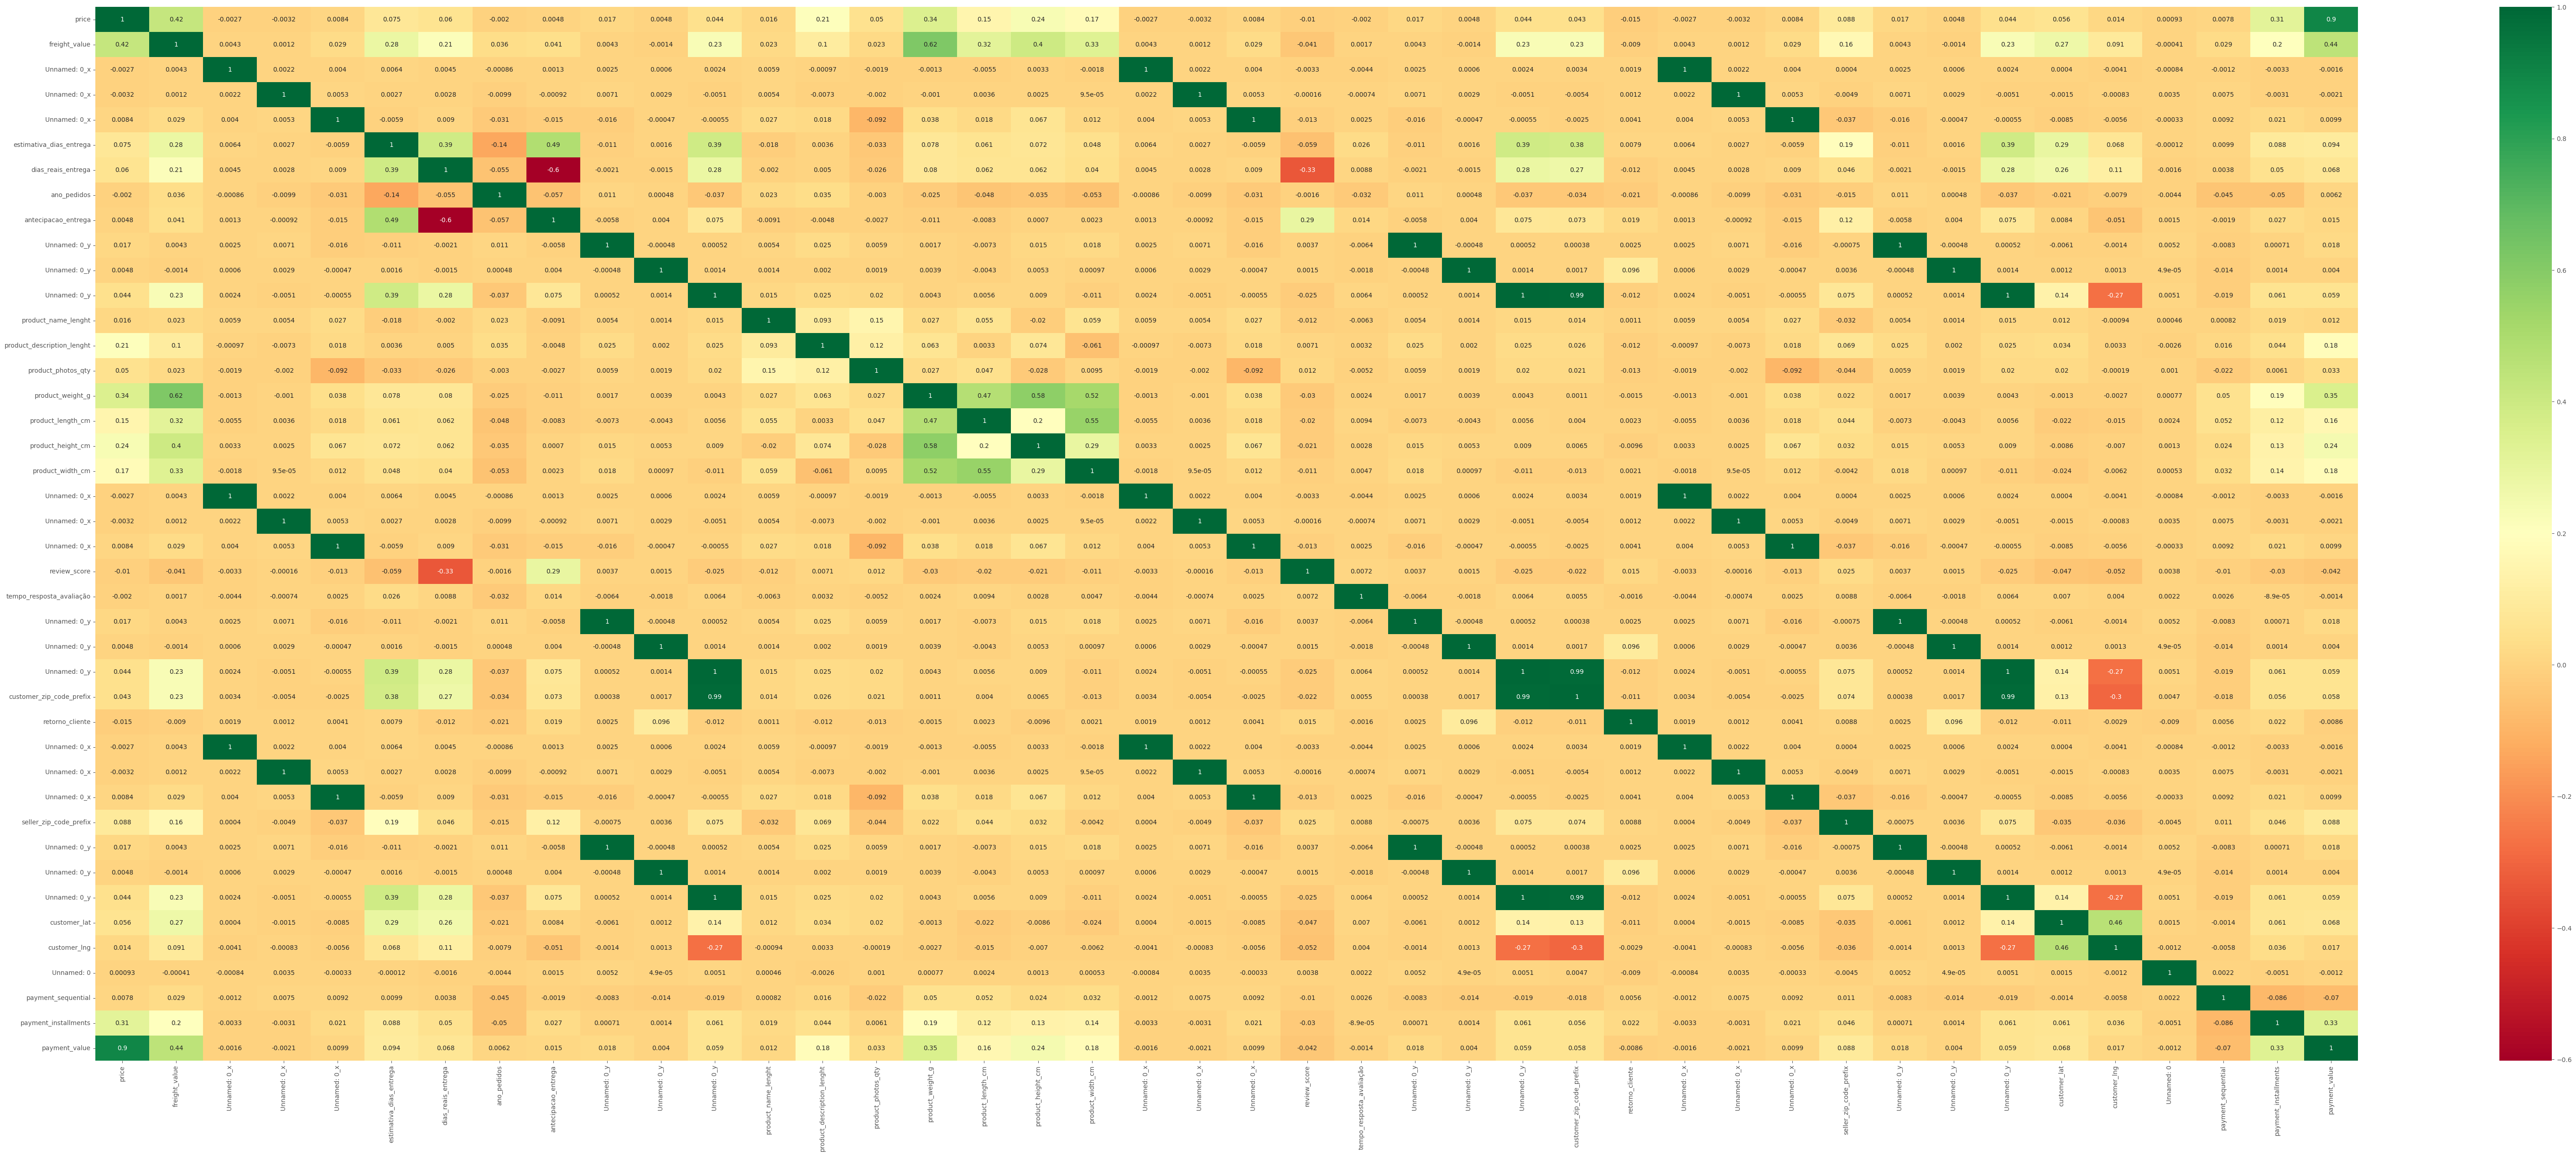

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_corr = final_df.corr()
top_corr_features = matriz_corr.index
plt.figure(figsize=(80,30))

g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Analisando parâmetros do novo DataFrame

## Data entrega

Média de dias de entrega (by the median value):  10.0


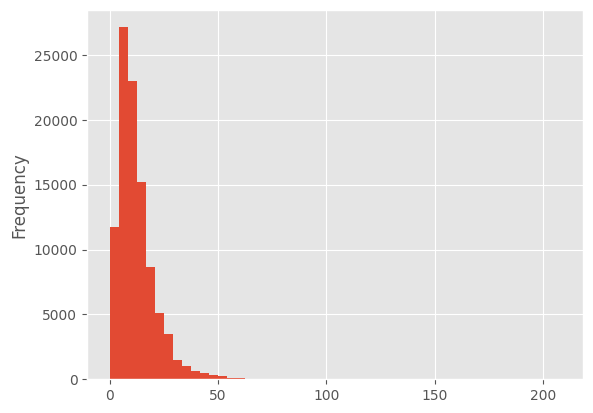

In [96]:
print('Média de dias de entrega (by the median value): ', final_df['dias_reais_entrega'].median())
final_df['dias_reais_entrega'].plot.hist(bins=50);

In [97]:
final_df[final_df.dias_reais_entrega.isna()]['order_status'].value_counts()

shipped       1066
invoiced       313
processing     310
delivered        8
approved         2
Name: order_status, dtype: int64

Para análise do cliente, a Olist envia pesquisas aos clientes quando o pedido é entregue ou o tempo estimado de entrega já ultrapassou. Portanto, para os pedidos que ainda não têm a data de entrega, mas ainda têm pontuações de revisão, isso significa que eles não foram entregues no dia da revisão.

Com base nos dias de entrega reais médios e no status de cada pedido, estimamos o tempo extra (além do tempo de entrega estimado para cada pedido) considerando:

- enviado: +5 dias
- faturado/processando/aprovado: + 10 dias
- entregue: +1 dia

In [98]:
# definindo filtros com base em order_status
filtro_enviado = (final_df['dias_reais_entrega'].isna() & (final_df['order_status'] == 'shipped'))
filtro_entregue = (final_df['dias_reais_entrega'].isna() & (final_df['order_status'] == 'delivered'))
outros = ['invoiced', 'processing', 'approved']
filtro_outros = (final_df['dias_reais_entrega'].isna() & final_df['order_status'].isin(outros))


# preenchendo os valores com tempo extra acordado
final_df.loc[filtro_enviado, 'dias_reais_entrega'] = final_df.loc[filtro_enviado, 'estimativa_dias_entrega'] + 5
final_df.loc[filtro_entregue, 'dias_reais_entrega'] = final_df.loc[filtro_entregue, 'estimativa_dias_entrega'] + 1
final_df.loc[filtro_outros, 'dias_reais_entrega'] = final_df.loc[filtro_outros, 'estimativa_dias_entrega'] + 10

Criando coluna para rastrear se a entrega está atrasada.

In [99]:
final_df['entrega_atrasada'] = (final_df['dias_reais_entrega'] > final_df['estimativa_dias_entrega']).astype(int)
final_df['entrega_atrasada'].value_counts()

0    92522
1     8239
Name: entrega_atrasada, dtype: int64

## Analisando Status do Pedido

Proporção do pedido com base no Status do Pedido

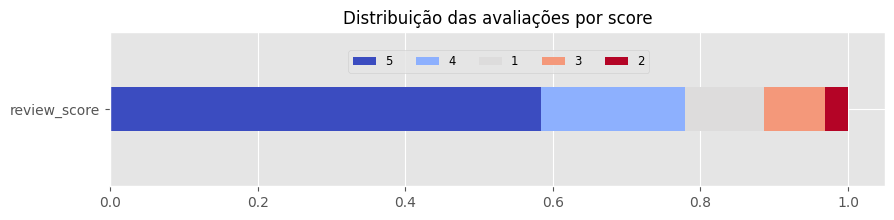

In [100]:
review_score_pct = final_df['review_score'].value_counts(normalize=True)
review_score_pct.to_frame().T.plot.barh(stacked=True, figsize=(10,2), width=0.2,
                                 colormap='coolwarm').legend(loc='upper left', ncol=1)
plt.title('Distribuição das avaliações por score', fontsize=12)
plt.legend(ncol=5, bbox_to_anchor=(0.3, 0.7), loc='lower left', fontsize='small')
plt.show()

A distribuição do atributo order_status é altamente desequilibrada, com 98% dos pedidos sendo declarados 'entregues' e o restante dividido em 'enviado', 'faturado', 'processando' e 'aprovado'.
Vamos analisar os pedidos não entregues.

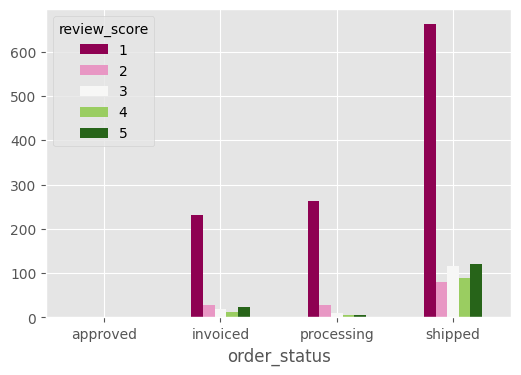

In [101]:
filtro_não_entregue = (final_df['order_status'] != 'delivered')
pd.crosstab(final_df[filtro_não_entregue]['order_status'], 
            final_df[filtro_não_entregue]['review_score']).plot.bar(cmap='PiYG', figsize=(6,4), rot=0)
plt.show()

Em 3 categorias principais de pedidos não entregues, pontuações baixas de revisão, especialmente a pontuação 1, são amplamente dominantes. Como esses pedidos ocupam uma proporção pequena no conjunto de dados e todos compartilham essa característica, vamos reagrupar em uma categoria não entregue (valor 0) e categoria entregue (valor 1).

In [102]:
final_df['delivered'] = np.where(final_df['order_status']=='delivered', 1, 0)


## Analisando recursos de dimensão do produto

In [103]:
final_df[final_df.product_weight_g.isna()][['product_length_cm', 'product_height_cm', 'product_width_cm']]

,product_length_cm,product_height_cm,product_width_cm


Todos os valores ausentes nessas 4 colunas são das mesmas 20 linhas. Como essas 20 linhas são insignificantes para o tamanho dos nossos dados, vamos eliminá-las.

In [104]:
final_df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=0, inplace=True)

In [105]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100761 entries, 0 to 100760
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    100761 non-null  object 
 1   product_id                  100761 non-null  object 
 2   seller_id                   100761 non-null  object 
 3   price                       100761 non-null  float64
 4   freight_value               100761 non-null  float64
 5   Unnamed: 0_x                100761 non-null  int64  
 6   customer_id                 100761 non-null  object 
 7   order_status                100761 non-null  object 
 8   order_purchase_timestamp    100761 non-null  object 
 9   estimativa_dias_entrega     100761 non-null  float64
 10  dias_reais_entrega          100761 non-null  float64
 11  ano_pedidos                 100761 non-null  int64  
 12  antecipacao_entrega         100761 non-null  int64  
 13  Unnamed: 0_y  

## Análise avaliação

In [106]:
# Soma análise avaliação
final_df["review_score"].value_counts()

5    58856
4    19697
1    10747
3     8307
2     3154
Name: review_score, dtype: int64

In [107]:
# análise de pontuação - percentual
final_df["review_score"].value_counts() / final_df["review_score"].count() * 100

5    58.411489
4    19.548238
1    10.665833
3     8.244261
2     3.130179
Name: review_score, dtype: float64

C:\ProgramData\Anaconda3\envs\pycaret\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


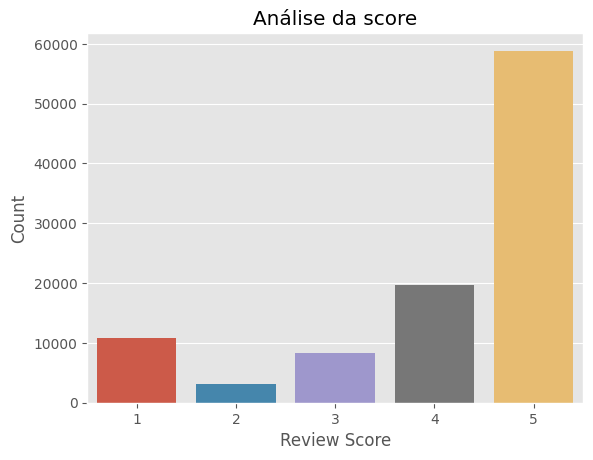

In [108]:
score = sns.countplot(final_df["review_score"])
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.title("Análise da score")
plt.show(score)

As pontuações altas 4 e 5 representam um total aproximado de 78% dos pedidos, enquanto as pontuações baixas 1, 2 e 3 representam apenas 10%, 3% e 8%, respectivamente

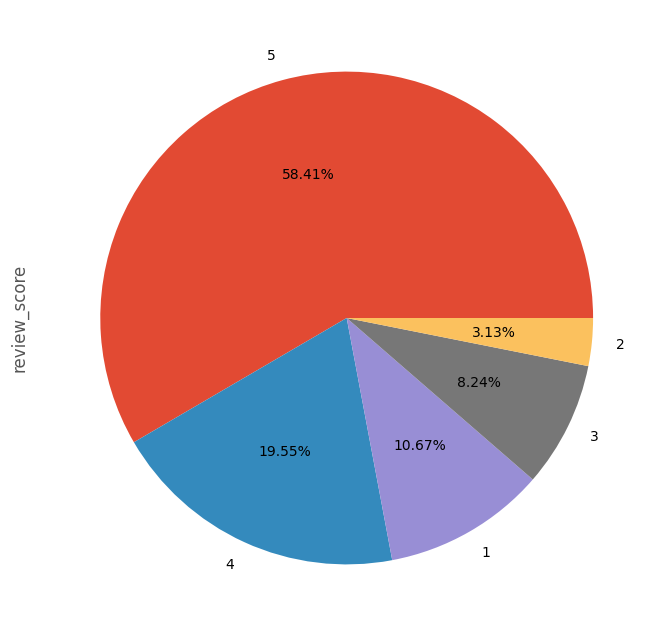

In [109]:
final_df['review_score'].value_counts().plot.pie(autopct='%1.2f%%', figsize=(8, 8));

No gráfico acima, podemos verificar que cerca de 75,62% deram uma boa pontuação de avaliação ou deram um valor mínimo de 4 em 5. Para o valor de avaliação com 1 na faixa de 12,54%.

Depois de sabermos a porcentagem de avaliações dadas pelos clientes, tentaremos analisr o que faz com que os clientes atribuirem uma classificação de avaliação de 1 a partir do limite máximo de 5.

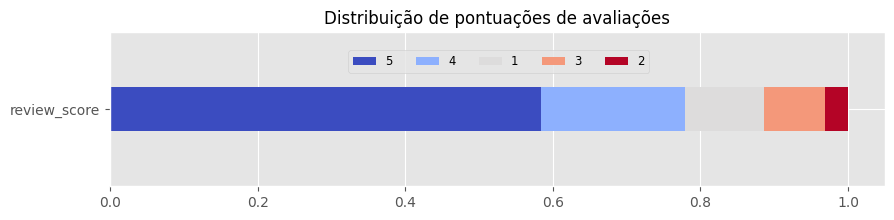

In [110]:
review_score_pts = final_df['review_score'].value_counts(normalize=True)
review_score_pts.to_frame().T.plot.barh(stacked=True, figsize=(10,2), width=0.2,
                                 colormap='coolwarm').legend(loc='upper left', ncol=1)
plt.title('Distribuição de pontuações de avaliações', fontsize=12)
plt.legend(ncol=5, bbox_to_anchor=(0.3, 0.7), loc='lower left', fontsize='small')
plt.show()

Vamos tentar analisar as avaliações com pontuação = 1

In [111]:
avaliacao_class_1 = final_df[final_df['review_score'] == 1]
avaliacao_class_1 = avaliacao_class_1.drop_duplicates()
avaliacao_class_1[['product_category_name', 'price', 'product_name_lenght', 'product_photos_qty', 'product_description_lenght']]

,product_category_name,price,product_name_lenght,product_photos_qty,product_description_lenght
8,beleza_saude,145.95,59.0,1.0,493.0
16,perfumaria,144.00,43.0,1.0,116.0
33,cama_mesa_banho,39.00,46.0,1.0,246.0
36,informatica_acessorios,809.10,60.0,1.0,2136.0
43,beleza_saude,18.99,47.0,3.0,1474.0
...,...,...,...,...,...
100720,ferramentas_jardim,129.00,33.0,1.0,509.0
100722,moveis_escritorio,79.99,26.0,1.0,1177.0
100727,casa_construcao,146.90,52.0,2.0,1132.0
100738,cool_stuff,129.99,33.0,1.0,897.0


No descritivo acima, várias causas podem levar a um valor de avaliação = 1. 

### Avaliação por categoria

Vamos analisar categoria de produto que recebe muitas avaliações = 1
Exponho os 20 principais dados relativos à categoria de mercadorias que receberam uma classificação de 1 e, em seguida, também descrevendo os dados em forma gráfica


In [112]:
avaliacao_class_1['product_category_name'].value_counts().head(20).sort_values(ascending=False)

cama_mesa_banho                1171
beleza_saude                    897
informatica_acessorios          806
moveis_decoracao                774
esporte_lazer                   759
relogios_presentes              660
utilidades_domesticas           558
telefonia                       483
automotivo                      417
ferramentas_jardim              376
brinquedos                      368
bebes                           339
perfumaria                      338
cool_stuff                      331
eletronicos                     271
moveis_escritorio               226
not_reported                    220
papelaria                       181
fashion_bolsas_e_acessorios     174
pet_shop                        149
Name: product_category_name, dtype: int64

C:\ProgramData\Anaconda3\envs\pycaret\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


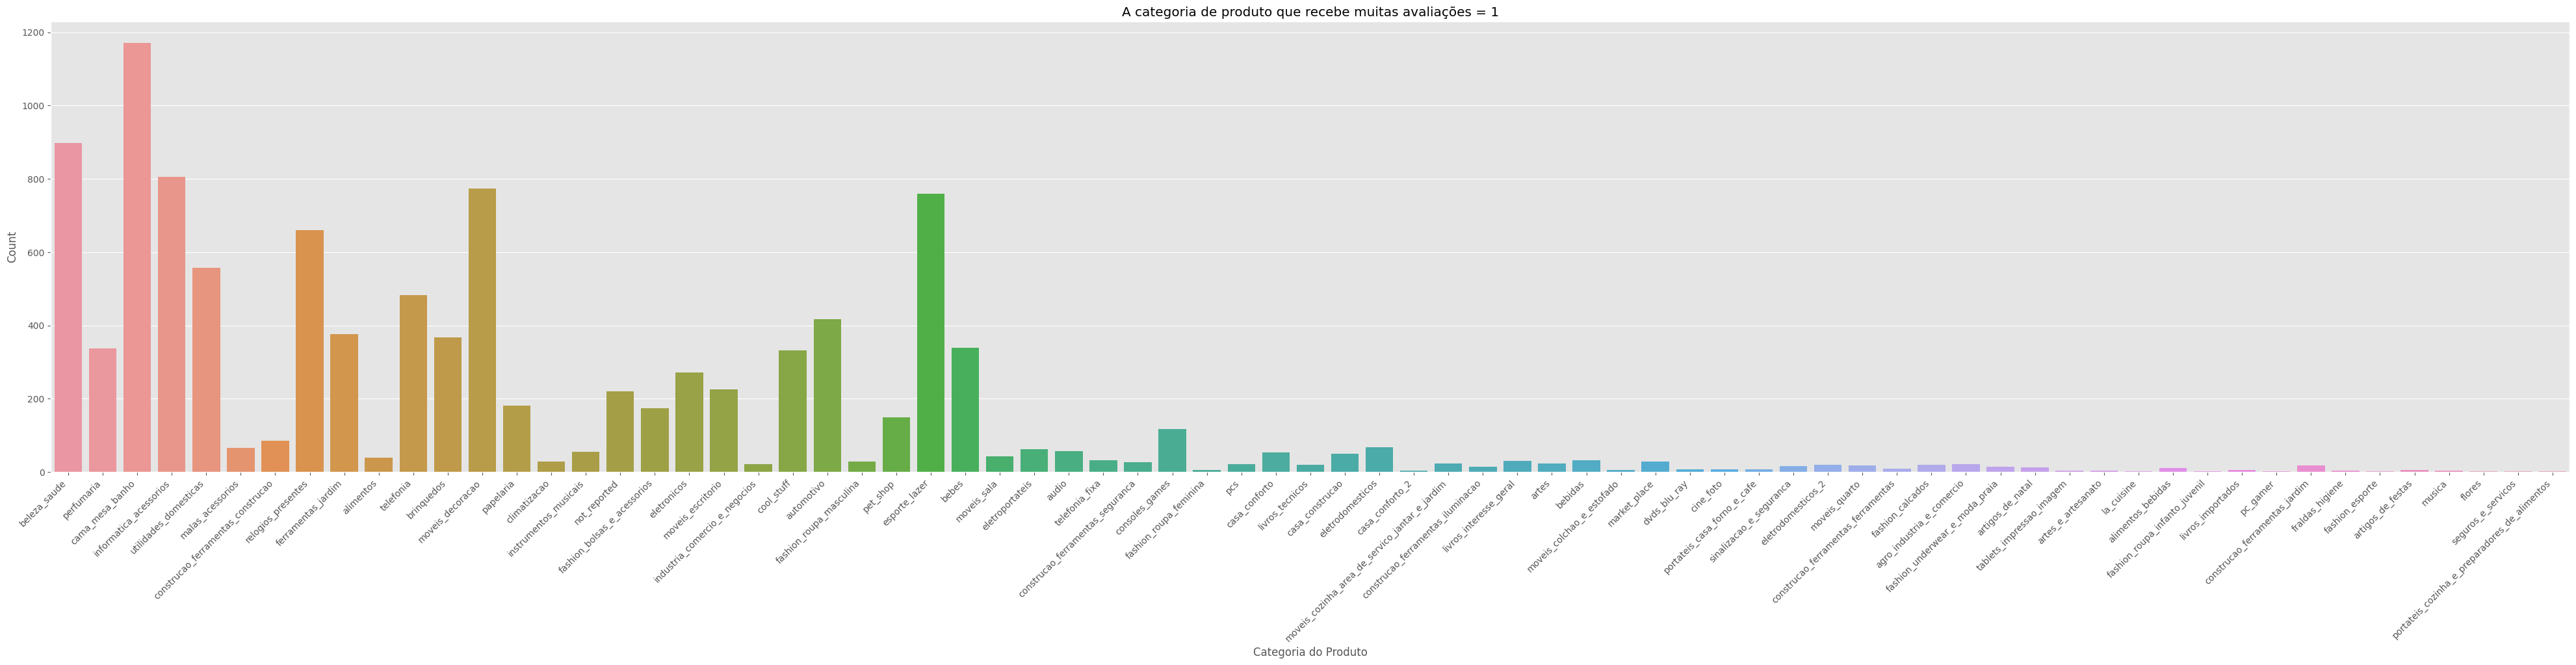

In [113]:
plt.figure(figsize=(50,9))
plt.xticks(rotation=45, ha='right')
visu_avaliacao = sns.countplot(avaliacao_class_1['product_category_name'])
plt.xlabel("Categoria do Produto")
plt.ylabel("Count")
plt.title("A categoria de produto que recebe muitas avaliações = 1")
plt.show(visu_avaliacao)

## Produtos com melhor e pior classificação

### Produtos com 30 ou mais avaliações

In [114]:
plt.figure(figsize=(12,12))
aval_score = final_df.groupby("product_category_name")["review_score"].agg(["mean", "count"]).sort_values(by="mean",ascending=False)

melhor_avaliado = aval_score[aval_score["count"]>=30][:20]
melhor_avaliado

,mean,count
product_category_name,,
livros_interesse_geral,4.497053,509
alimentos_bebidas,4.400881,227
livros_tecnicos,4.400778,257
livros_importados,4.396226,53
construcao_ferramentas_ferramentas,4.395833,96
malas_acessorios,4.362617,1070
portateis_casa_forno_e_cafe,4.302632,76
alimentos,4.300668,449
dvds_blu_ray,4.274194,62


<Figure size 1200x1200 with 0 Axes>

### Os 20 últimos produtos por pontuação de avaliação

In [115]:
pior_avaliado = aval_score[aval_score["count"]>=30].sort_values(by='mean')[:20]
pior_avaliado


,mean,count
product_category_name,,
moveis_escritorio,3.649042,1305
fashion_roupa_masculina,3.650000,120
fashion_roupa_feminina,3.763158,38
moveis_colchao_e_estofado,3.846154,39
audio,3.865922,358
construcao_ferramentas_seguranca,3.914634,164
telefonia_fixa,3.930556,216
not_reported,3.952022,1459
fashion_underwear_e_moda_praia,3.969466,131


## Analisando tempo de entrega

In [116]:
final_df.head()

,order_id,product_id,seller_id,price,freight_value,Unnamed: 0_x,customer_id,order_status,order_purchase_timestamp,estimativa_dias_entrega,...,Unnamed: 0_y,customer_lat,customer_lng,Unnamed: 0,payment_sequential,payment_type,payment_installments,payment_value,entrega_atrasada,delivered
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,85267,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13,16.0,...,7570.0,-21.758076,-41.312633,85283.0,1.0,credit_card,2.0,72.19,0,1
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,71853,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26,19.0,...,5620.0,-20.212393,-50.941471,2499.0,1.0,credit_card,3.0,259.83,0,1
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6298,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14,22.0,...,8787.0,-19.860439,-44.597972,12393.0,1.0,credit_card,5.0,216.87,0,1
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,22550,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08,12.0,...,4798.0,-23.144923,-46.539830,32971.0,1.0,credit_card,2.0,25.78,0,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,5247,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04,41.0,...,4967.0,-23.249008,-46.824961,98711.0,1.0,credit_card,3.0,218.04,0,1


In [132]:
final_df['erro_estimativa_dias_entrega'] = final_df['dias_reais_entrega'] -final_df['estimativa_dias_entrega']

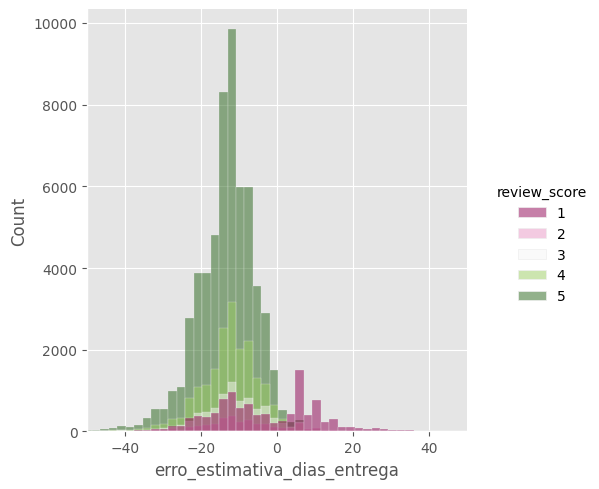

In [118]:
sns.displot(data=final_df, x="erro_estimativa_dias_entrega", hue="review_score", palette='PiYG', bins=150)
plt.xlim((-50,50))
plt.show()

Podemos dar uma olhada mais de perto nas contagens de comentários insatisfeitos

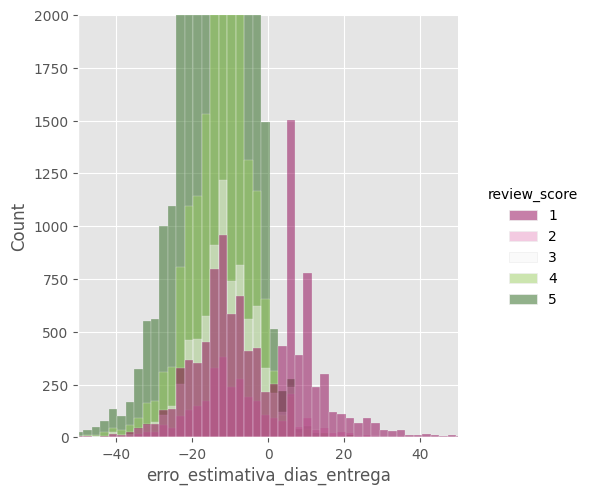

In [119]:
sns.displot(data=final_df, x="erro_estimativa_dias_entrega", hue="review_score", palette='PiYG', bins=150)
plt.xlim((-50,50))
plt.ylim((0,2000))

plt.show()

Quando o tempo de entrega real é maior do que o esperado (erro de estimativa > 0), o número de avaliações insatisfeitas aumenta notavelmente.

### Analisando o tempo de entrega ao longo do tempo

In [133]:
final_df['tempo_resposta_avaliação'].describe()

count    100761.000000
mean          2.584125
std          10.028574
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max         518.000000
Name: tempo_resposta_avaliação, dtype: float64

Os dados acima mostram que 50% das avaliações foram criadas no primeiro dia de recebimento das pesquisas. Vamos transformar este atributo em uma variável categórica dependendo do intervalo de atraso.


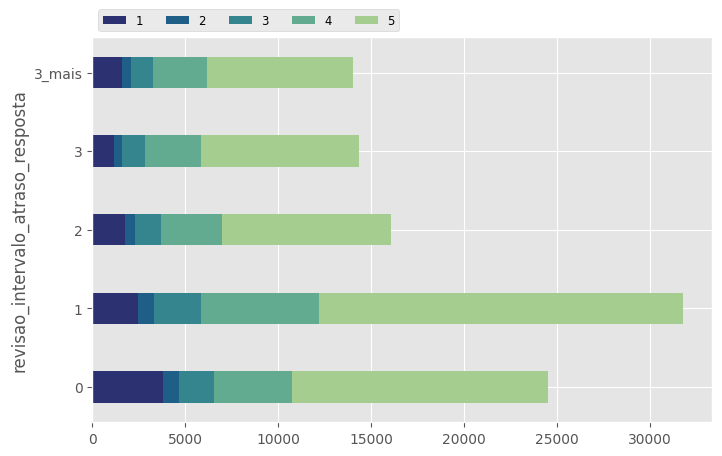

In [121]:
atraso_bins = [-1, 0, 1, 2, 3, 518]
atraso_rotulo = ['0', '1', '2', '3', '3_mais']
final_df['revisao_intervalo_atraso_resposta'] = pd.cut(final_df['tempo_resposta_avaliação'], atraso_bins, labels=atraso_rotulo)

pd.crosstab(final_df['revisao_intervalo_atraso_resposta'],
            final_df['review_score']).plot.barh(figsize=(8, 5), stacked=True,
                                                            width=0.4, cmap='crest_r')
plt.legend(ncol=5 ,bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
plt.show()

O gráfico mostra que os clientes insatisfeitos tendem a dar feedback antes de 1 dia após o recebimento da pesquisa. Codificaremos esse recurso para binário para ver se ele pode ajudar a detectar pontuações baixas nas avaliações.


In [122]:
delay_dummies = pd.get_dummies(final_df['revisao_intervalo_atraso_resposta'], prefix='revisão intervalo de atraso')
final_df = pd.concat([final_df, delay_dummies], axis=1)

## Categorias de produtos mais vendidas

In [123]:
top_categ_vendida = final_df.groupby("product_category_name").agg({'order_id':'nunique','payment_value':'sum'}).sort_values("payment_value", ascending=False)[:10]
top_categ_vendida.rename(columns={"order_id":"Nº_de_encomendas", "payment_value":"receitas"}, inplace=True)
top_categ_vendida

,Nº_de_encomendas,receitas
product_category_name,,
beleza_saude,8596,1413719.64
relogios_presentes,5512,1283113.30
cama_mesa_banho,9016,1201038.06
esporte_lazer,7479,1125883.22
informatica_acessorios,6498,1030110.95
moveis_decoracao,6160,878043.86
utilidades_domesticas,5720,765514.14
cool_stuff,3546,691883.35
automotivo,3818,668099.17


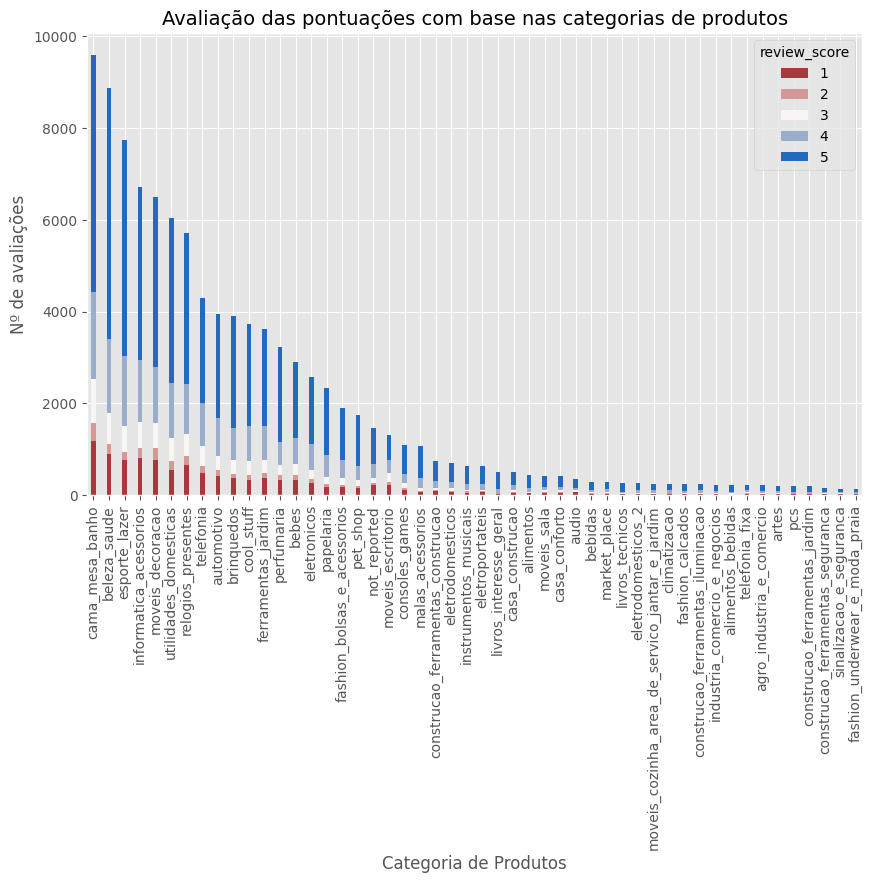

In [124]:
categoria_avaliacao = pd.crosstab(final_df['product_category_name'], final_df['review_score'], margins=True, margins_name='total_counts')
categoria_avaliacao.drop('total_counts', axis=0, inplace=True)
categoria_avaliacao.sort_values(by='total_counts', ascending=False, inplace=True)
categoria_avaliacao.drop('total_counts', axis=1)[:50].plot(kind='bar', stacked=True,
                                                        figsize=(10,6), width=0.3,cmap='vlag_r')
plt.title('Avaliação das pontuações com base nas categorias de produtos', fontsize=14)
plt.xlabel('Categoria de Produtos')
plt.ylabel('Nº de avaliações')
plt.show()

## Vendedor popular

In [125]:
vendas_por_vendedor = final_df['seller_id'].value_counts().reset_index()
vendas_por_vendedor.columns = ['seller_id', 'volume_vendas']
print(vendas_por_vendedor.shape)
vendas_por_vendedor.head(3)

(3038, 2)


,seller_id,volume_vendas
0,6560211a19b47992c3666cc44a7e94c0,1889
1,4a3ca9315b744ce9f8e9374361493884,1840
2,cc419e0650a3c5ba77189a1882b7556a,1692


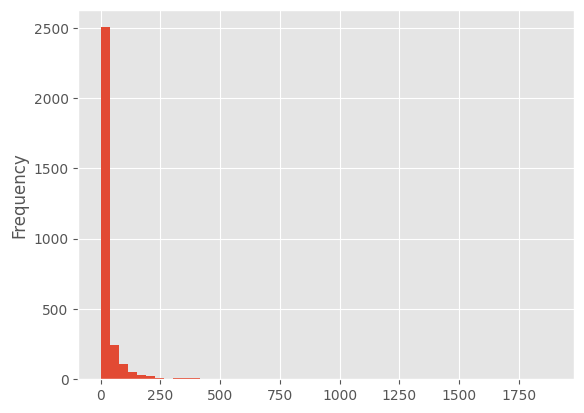

In [126]:
vendas_por_vendedor.volume_vendas.sort_values().plot.hist(bins=50);

In [127]:
# busca melhor vendedor

vendas_por_vendedor['vendedor_popular'] = (vendas_por_vendedor['volume_vendas'] >= 100).astype(int)

In [128]:
final_df = final_df.merge(vendas_por_vendedor[['seller_id', 'vendedor_popular']], on='seller_id', how='left')

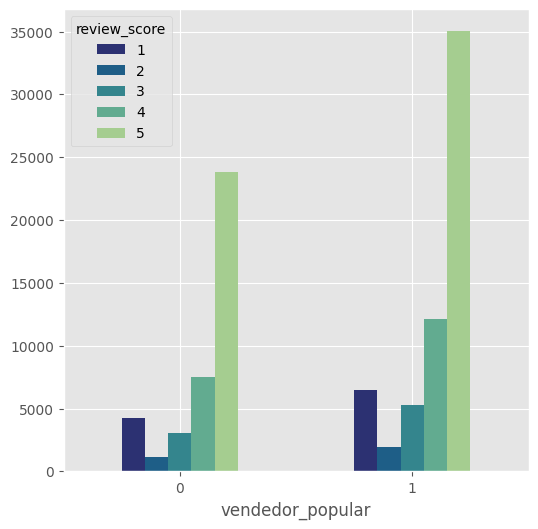

In [129]:
pd.crosstab(final_df['vendedor_popular'], final_df['review_score']).plot.bar(rot=0, figsize=(6,6),
                                                               cmap=sns.color_palette('crest_r', as_cmap=True))
plt.show()

## Tempo por compra

In [134]:
final_df['purchase_month'] = pd.to_datetime(final_df['order_purchase_timestamp']).dt.month
final_df['purchase_day'] = pd.to_datetime(final_df['order_purchase_timestamp']).dt.day

Avaliação das pontuações com base no ano e mês.
Retiraremos o ano de 2016 em que há um número pequeno de observações

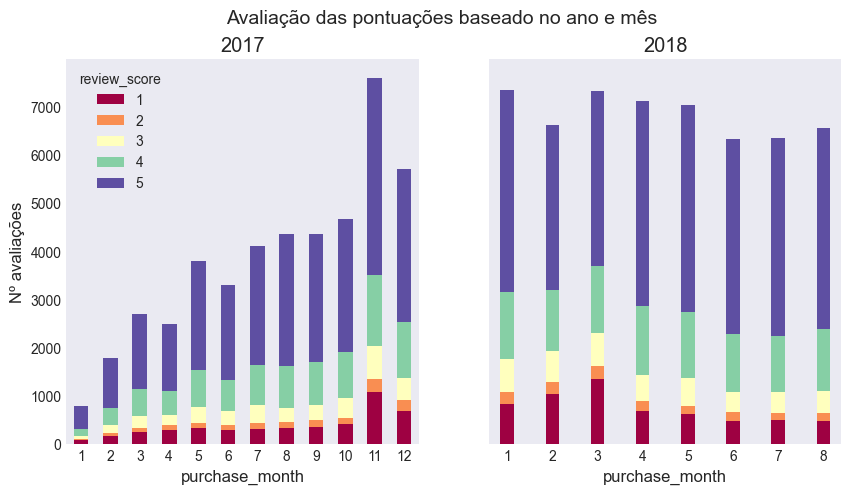

In [135]:
filtro_2017 = (final_df['ano_pedidos'] == 2017)
filtro_2018 = (final_df['ano_pedidos'] == 2018)
style.use('seaborn-dark')
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)
pd.crosstab(final_df[filtro_2017]['purchase_month'], final_df[filtro_2017]['review_score']).plot(ax=axes[0], kind='bar', width=0.5,
                                                                                 stacked=True, cmap='Spectral',
                                                                                 title='2017', rot=0)
pd.crosstab(final_df[filtro_2018]['purchase_month'], final_df[filtro_2018]['review_score']).plot(ax=axes[1], kind='bar',width=0.3,
                                                                                 stacked=True, cmap='Spectral',
                                                                                 title='2018', rot=0, legend=False)
plt.suptitle('Avaliação das pontuações baseado no ano e mês', fontsize=14)
axes[0].set_ylabel('Nº avaliações')
plt.show()


Os volumes de vendas variaram ao longo dos meses e anos

In [136]:
final_df.head()

,order_id,product_id,seller_id,price,freight_value,Unnamed: 0_x,customer_id,order_status,order_purchase_timestamp,estimativa_dias_entrega,...,erro_estimativa_dias_entrega,revisao_intervalo_atraso_resposta,revisão intervalo de atraso_0,revisão intervalo de atraso_1,revisão intervalo de atraso_2,revisão intervalo de atraso_3,revisão intervalo de atraso_3_mais,vendedor_popular,purchase_month,purchase_day
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,85267,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13,16.0,...,-9.0,1,0,1,0,0,0,1,9,13
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,71853,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26,19.0,...,-3.0,2,0,0,1,0,0,1,4,26
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6298,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14,22.0,...,-14.0,0,1,0,0,0,0,0,1,14
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,22550,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08,12.0,...,-6.0,0,1,0,0,0,0,0,8,8
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,5247,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04,41.0,...,-16.0,1,0,1,0,0,0,0,2,4


In [138]:
final_df.to_csv('Data/final_df.csv')